<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment2/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

Install Keras, Keras is a wrapper over tensorflow with many inbuilt functionalities that help to build neural network quicker.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Import the packages that are needed:
*   Numpy for mathematically calculations 
*   Functions from Keras to build neural network
*   MNIST dataset which will be the training data






In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Load the MNIST data into training set and test data. 


*   X contains the images (of numbers in grayscale)
*   Y represents the label for respective images in the X. (label is the number 0-9)



In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display the first image from the training set using the matplotlib library.

(60000, 28, 28)


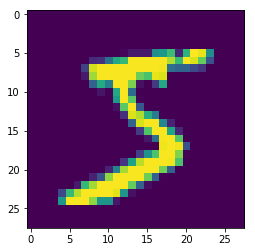

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshape the input data by adding another dimension to represent the number of channels. The number of channels for MNIST images is 1 (representing the grayscale)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalise the image pixel values. Normalization helps to train the network faster.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Display the first 10 values of y, the labels.

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

np.utils.to_categorical is used to convert array of labeled data(from 0 to number of classes-1) to one-hot vector.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Display first 10 values of Y. This time it will be the number assigned to the labels.

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Neural network model:
* 3 layers of 3x3 Convolutions with relu activation
* 1 layer of 2x2 Max polling
* 5 layers of 3x3 Convolutions with relu activation
* Flatten layer
* Output layer of softmax to get the probability for each label, which describes the confidence level of the network that the input is of a certain number

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
# input channel dimension: (28,28,1)
# Receptive field 3x3
# output (26,26,32)
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# input channel dimension: (26,26,32)
# receptive field 5x5
# output dimension (24, 24, 64)
model.add(Convolution2D(64, 3, 3, activation='relu'))

# input channel dimension (24, 24, 64)
# receptive field 9x9
# output dimension (22, 22, 128)
model.add(Convolution2D(128, 3, 3, activation='relu'))

# input channel dimension (22, 22, 128) 
# receptive field 18x18
# output dimension (11, 11, 128)
model.add(MaxPooling2D(pool_size=(2, 2)))

# input channel dimension (11, 11, 128)
# receptive field 20x20
# output dimension (9, 9, 256)
model.add(Convolution2D(256, 3, 3, activation='relu'))

# input channel dimension (9, 9, 256)
# receptive field 22x22
# output dimension ( 7, 7, 512)
model.add(Convolution2D(512, 3, 3, activation='relu'))

# input channel dimension ( 7, 7, 512) 
# receptive field 24x24
# output dimension (5, 5, 1024)
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# input channel dimension (5, 5, 1024)
# receptive field 26x26
# output dimension (3, 3, 2048)
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# input channel dimension (3, 3, 2048)
# receptive field 28x28
# output dimension ( 1, 1, 10)
model.add(Convolution2D(10, 3, 3, activation='relu'))

# input channel dimension ( 1, 1, 10) 
# output dimension 10, 
#each representing the confidence of predicting the input image as respective no.

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

#Modified Network

In [0]:
from keras.layers import Activation, MaxPooling2D,GlobalAveragePooling2D

model = Sequential() 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarnin

Configure the model with loss function, Cross Entropy and Adam optimizer.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Train the network with training set

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 20s 342us/step - loss: 1.0123 - acc: 0.5904
Epoch 2/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.9401 - acc: 0.6024
Epoch 3/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.9312 - acc: 0.6039
Epoch 4/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.9257 - acc: 0.6054
Epoch 5/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.9218 - acc: 0.6056
Epoch 6/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.9193 - acc: 0.6062
Epoch 7/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.9166 - acc: 0.6064
Epoch 8/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.9152 - acc: 0.6068
Epoch 9/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.9179 - acc: 0.6062
Epoch 10/10
60000/60000 [==============================] - 18s 293us/step - loss: 

Test the model with test dataset. 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

print the result of the test dataset

In [0]:
print(score)

[0.9350369338035583, 0.6081]


Find the predicted values

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.2354614e-18 5.2354614e-18 5.2354614e-18 5.2354614e-18 5.2354614e-18
  5.2354614e-18 5.2354614e-18 1.0000000e+00 5.2354614e-18 5.2354614e-18]
 [1.2742490e-08 1.2742490e-08 1.0000000e+00 1.2742490e-08 1.2742490e-08
  1.2742490e-08 1.2742490e-08 1.2742490e-08 1.2742490e-08 1.2742490e-08]
 [9.9471537e-16 1.0000000e+00 9.9471537e-16 9.9471537e-16 9.9471537e-16
  9.9471537e-16 9.9471537e-16 9.9471537e-16 9.9471537e-16 9.9471537e-16]
 [1.0000000e+00 2.3939248e-19 2.3939248e-19 2.3939248e-19 2.3939248e-19
  2.3939248e-19 2.3939248e-19 2.3939248e-19 2.3939248e-19 2.3939248e-19]
 [8.6201550e-21 8.6201550e-21 8.6201550e-21 8.6201550e-21 1.0000000e+00
  8.6201550e-21 8.6201550e-21 8.6201550e-21 8.6201550e-21 8.6201550e-21]
 [2.7342623e-18 1.0000000e+00 2.7342623e-18 2.7342623e-18 1.9257771e-17
  2.7342623e-18 2.7342623e-18 2.7342623e-18 2.7342623e-18 2.7342623e-18]
 [2.7326538e-20 2.7326538e-20 2.7326538e-20 2.7326538e-20 1.0000000e+00
  2.7326538e-20 2.7326538e-20 2.7326538e-20 4.9911598e-18 

# Neural network:
The network is a convolutional neural network which is efficient and fast as opposed to a fully connected network. But the original network did not seem to be training. The number of filters or neurons is quite high, reaching 2048 in the last layer for a small input image size of 28x28. 
The solution would be to reduce the number of filters, the highest number of filters will be 512 which is in the last convolutional layer.
More accuracy can be obtained by image augmentation.
